<a href="https://colab.research.google.com/github/meburns2011/Operation-Fistula-s-Pilot-Program/blob/main/Fistulas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from  google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


pilot_fistula = '/content/20201027 pilot data.csv'
df = pd.read_csv(pilot_fistula)
df


,Patient ID,Country,Age,Patient symptoms,Years leaking,Outcome of surgery,Years lost,Years gained,Surgery cost (USD)
0,1,Malawi,36,Leaking urine,6,Continent,2.052,10.45494,190
1,3,Malawi,30,Leaking urine,0,Continent,0.000,12.50694,190
2,4,Malawi,26,Leaking urine,0,Continent,0.000,13.87494,190
3,5,Malawi,60,Leaking urine,0,Continent,0.000,2.24694,190
4,6,Malawi,48,Leaking urine,0,Continent,0.000,6.35094,190
...,...,...,...,...,...,...,...,...,...
633,764,Madagascar,26,Leaking urine,6,Continent,2.052,14.39820,190
634,765,Madagascar,22,Leaking urine,5,Continent,1.710,15.76620,190
635,766,Madagascar,25,Leaking urine,7,Continent,2.394,14.74020,190
636,767,Madagascar,20,Leaking urine,2,Continent,0.684,16.45020,190


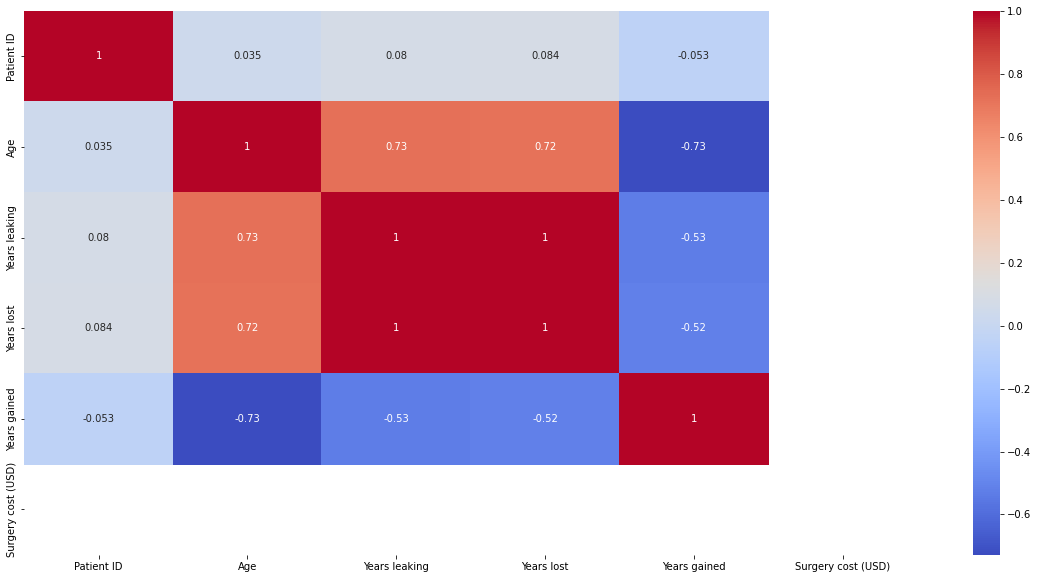

In [17]:
corr=df.corr
corr=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,cmap='coolwarm',annot=True)

There is a strong positive correlation with Age, Years Lost, Leaking and Gained. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638 entries, 0 to 637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient ID          638 non-null    int64  
 1   Country             638 non-null    object 
 2   Age                 638 non-null    int64  
 3   Patient symptoms    638 non-null    object 
 4   Years leaking       638 non-null    int64  
 5   Outcome of surgery  638 non-null    object 
 6   Years lost          638 non-null    float64
 7   Years gained        638 non-null    float64
 8   Surgery cost (USD)  638 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 45.0+ KB


In [40]:
df.value_counts('Outcome of surgery')

Outcome of surgery
Continent             562
Partial Continence     54
Incontinent            22
dtype: int64

In [14]:
df.value_counts('Country')

Country
Madagascar    403
Malawi        204
Mauritania     14
Zambia         13
Mozambique      4
dtype: int64

In [ ]:
df.isna().sum()

Patient ID            0
Country               0
Age                   0
Patient symptoms      0
Years leaking         0
Outcome of surgery    0
Years lost            0
Years gained          0
Surgery cost (USD)    0
dtype: int64

In [ ]:
df.value_counts('Patient symptoms')

Patient symptoms
Leaking urine              607
Leaking urine and feces     17
Leaking feces               14
dtype: int64

In [ ]:
df.value_counts('Outcome of surgery')

Outcome of surgery
Continent             562
Partial Continence     54
Incontinent            22
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcb44d4210>]],
      dtype=object)

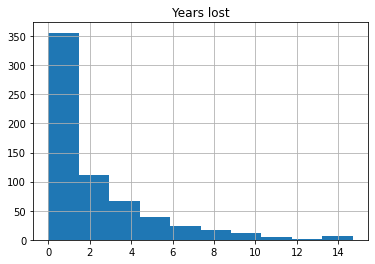

In [4]:
df.hist('Years lost')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc9a858a10>]],
      dtype=object)

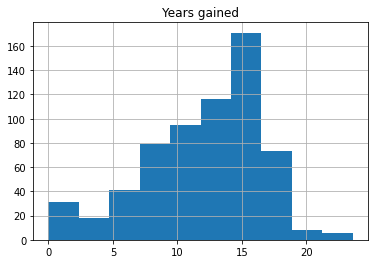

In [5]:
df.hist('Years gained')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc9a8014d0>]],
      dtype=object)

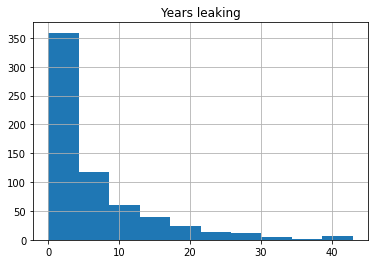

In [6]:
df.hist('Years leaking')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc9a713050>]],
      dtype=object)

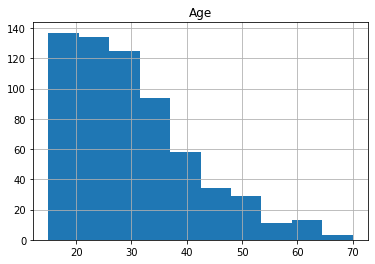

In [7]:
df.hist('Age')

Text(0.5, 0, 'Age')

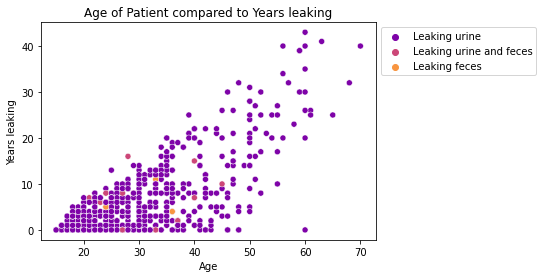

In [16]:
ax = sns.scatterplot(data=df, x = 'Age', y = 'Years leaking', hue = 'Patient symptoms', palette = 'plasma')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('Age of Patient compared to Years leaking')
ax.set_xlabel('Age')

I can see an upward trend in age to Years Leaking. Some of these women have been dealing with this symptom for up to 40 years. Which means that this problem has been overlooked for several years. 

Text(0.5, 0, 'Age')

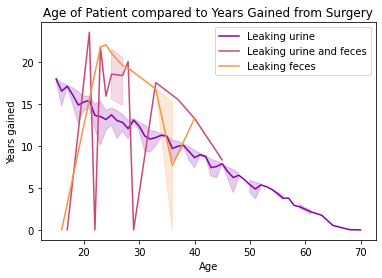

In [53]:
ax = sns.lineplot(data=df, x = 'Age', y = 'Years gained', hue = 'Patient symptoms', palette = 'plasma')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('Age of Patient compared to Years Gained from Surgery')
ax.set_xlabel('Age')

Leaking Urine as a symptom has a downward trend with age but what about the other two symptoms? Why did those people not gain back years similar to their age cohorts?

Text(0.5, 1.0, 'Cases per Country')

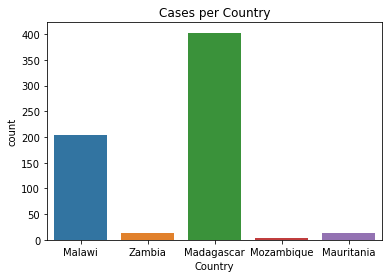

In [64]:
ax=sns.countplot(x='Country',data=df)
ax.set_title('Cases per Country')

Text(0.5, 1.0, 'Years of Symptoms per Country')

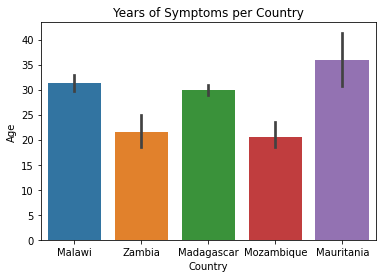

In [65]:
ax=sns.barplot(data=df,x='Country', y='Age')
ax.set_title('Years of Symptoms per Country')

Mauritania had less cases but their patients had been having symptoms for much longer. 

Text(0.5, 1.0, 'Outcome of Surgery')

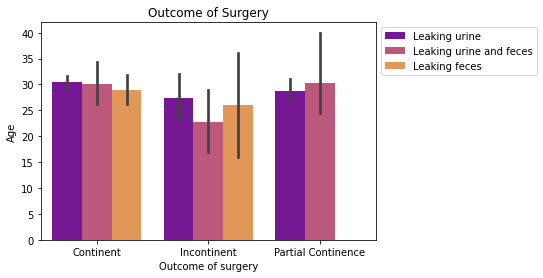

In [50]:
ax = sns.barplot(data=df, x = 'Outcome of surgery', y = 'Age', hue = 'Patient symptoms', palette = 'plasma')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('Outcome of Surgery')


Text(0.5, 1.0, 'Outcome of Surgery')

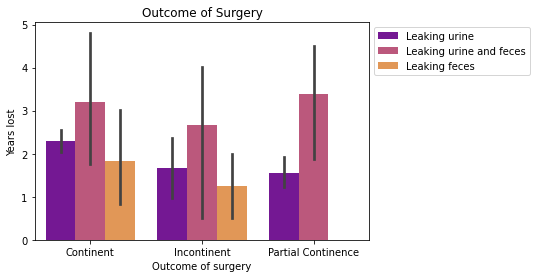

In [61]:
ax = sns.barplot(data=df, x = 'Outcome of surgery',y= 'Years lost', hue = 'Patient symptoms', palette = 'plasma')
ax.legend(bbox_to_anchor=[1,1])
ax.set_title('Outcome of Surgery')

Continent surgery outcome is not as high as I would like it to be. There doesn't seem to be a correlation with Age or years leaking with the outcome of the surgery. 

Text(0.5, 1.0, 'Outcome of Surgery')

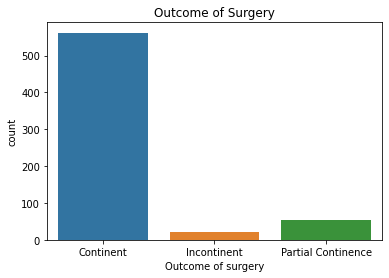

In [66]:
ax=sns.countplot(x='Outcome of surgery',data=df)
ax.set_title('Outcome of Surgery')

That is a much better representation of outcome of symptoms! Most of the surgeries were successful. Excellent. 